                      timestamp  mid_price  future_mid_price  \
0 2025-07-06 10:42:24.260275968  100.02495         100.02755   
1 2025-07-06 10:42:24.260375968  100.02350         100.02540   
2 2025-07-06 10:42:24.260475968  100.02660         100.02650   
3 2025-07-06 10:42:24.260575968  100.02605         100.02990   
4 2025-07-06 10:42:24.260675968  100.02715         100.02955   

   mid_price_change  obi_level_1  
0           0.00260     0.536913  
1           0.00190     0.306488  
2          -0.00010    -0.582278  
3           0.00385    -0.878788  
4           0.00240     0.238095  


<function matplotlib.pyplot.show(close=None, block=None)>

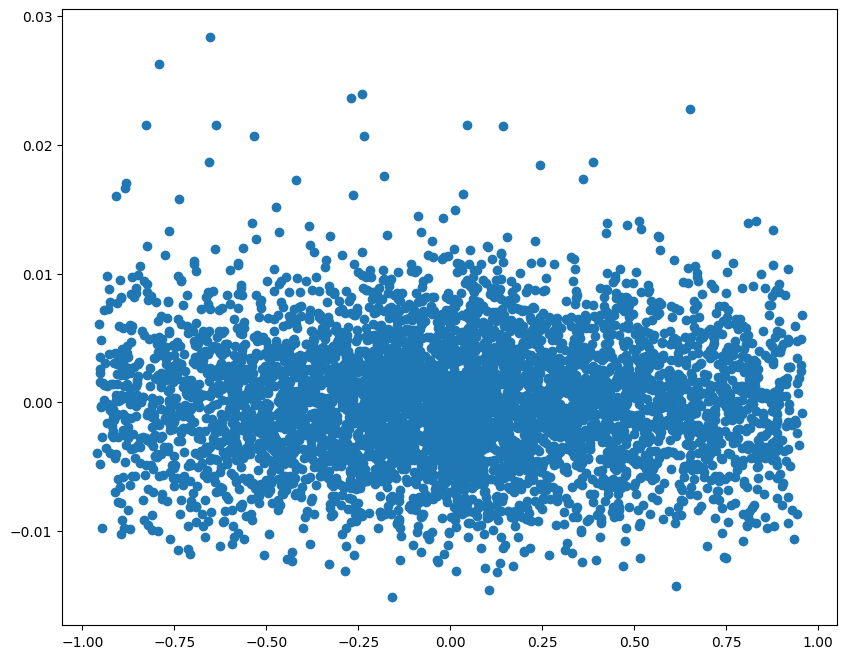

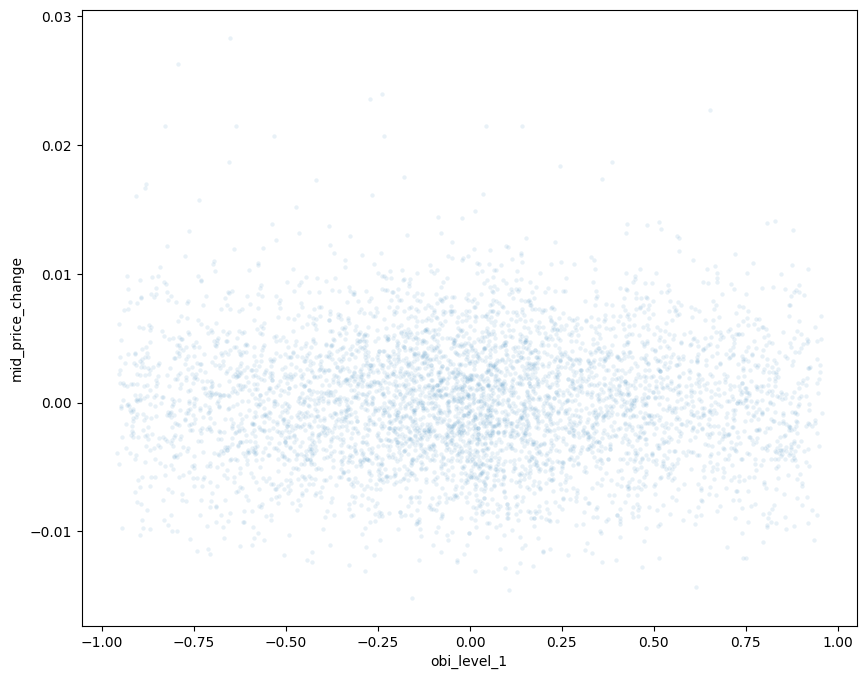

In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df_ob = pd.read_csv('order_book_snapshot.csv')
df_trades = pd.read_csv('trades.csv')

df_ob['timestamp'] = pd.to_datetime(df_ob['timestamp'], unit='ns')
df_trades['timestamp'] = pd.to_datetime(df_trades['timestamp'], unit='ns')

df_ob_sorted = df_ob.sort_values(by='timestamp').copy()
df_trades_sorted = df_trades.sort_values(by='timestamp').copy()

df_ob_sorted['mid_price'] = (df_ob_sorted['ask_price_1'] + df_ob_sorted['bid_price_1']) / 2

for j in range(1,11):
    
    df_ob_sorted[f'obi_level_{j}'] = (df_ob_sorted[f'bid_volume_{j}'] - df_ob_sorted[f'ask_volume_{j}']) / (df_ob_sorted[f'bid_volume_{j}'] + df_ob_sorted[f'ask_volume_{j}'])
#print(df_ob_sorted['obi_level_1'])

bid_vol_1 = df_ob_sorted['bid_volume_1']
ask_vol_1 = df_ob_sorted['ask_volume_1']

denominator_obi = bid_vol_1 + ask_vol_1
numerator_obi = bid_vol_1 - ask_vol_1

df_ob_sorted['obi_level_1'] = numerator_obi.divide(denominator_obi).fillna(0)
#print(df_ob_sorted['obi_level_1'])


if not df_ob_sorted.empty:
    predict = 5

    df_ob_sorted['future_mid_price'] = df_ob_sorted['mid_price'].shift(-predict)

    df_ob_sorted['mid_price_change'] = df_ob_sorted['future_mid_price'] - df_ob_sorted['mid_price']

    df_order_book_processed = df_ob_sorted.dropna(subset=['future_mid_price', 'mid_price_change']).copy()

    print(df_order_book_processed[['timestamp', 'mid_price', 'future_mid_price', 'mid_price_change', 'obi_level_1']].head())

plt.figure(figsize=(10,8))
plt.scatter(df_order_book_processed['obi_level_1'], df_order_book_processed['mid_price_change'])
plt.show

plt.figure(figsize=(10,8))
sns.scatterplot(x='obi_level_1', y='mid_price_change', data=df_order_book_processed, s=10, alpha=0.1)
plt.show

In [52]:
max_level_check = 10 
cum_ask_cols = []

for j in range(1, max_level_check + 1):
    curr_ask_cols = [f'ask_volume_{i}' for i in range(1, j+1)]

    if all(col in df_ob_sorted.columns for col in curr_ask_cols):
        df_ob_sorted[f'cum_ask_vol_{j}'] = df_ob_sorted[curr_ask_cols].sum(axis=1)
        cum_ask_cols.append(f'cum_ask_vol_{j}')

print(df_ob_sorted[cum_ask_cols].head())


   cum_ask_vol_1  cum_ask_vol_2  cum_ask_vol_3  cum_ask_vol_4  cum_ask_vol_5  \
0             69            559            796            808            845   
1            155            651            969           1231           1348   
2            375            651            935           1063           1409   
3            434            924           1354           1637           1730   
4            272            736           1025           1484           1589   

   cum_ask_vol_6  cum_ask_vol_7  cum_ask_vol_8  cum_ask_vol_9  cum_ask_vol_10  
0           1344           1436           1614           1982            2302  
1           1388           1549           1966           2197            2672  
2           1647           2136           2524           2964            3132  
3           2055           2246           2282           2778            3137  
4           1754           2233           2311           2711            3124  


In [53]:
max_level_check = 10

cum_bid_cols = []

for j in range(1, max_level_check + 1):
    curr_bid_cols = [f'bid_volume_{i}' for i in range(1, j+1)]

    if all(col in df_ob_sorted.columns for col in curr_bid_cols):
        df_ob_sorted[f'cum_bid_vol_{j}'] = df_ob_sorted[curr_bid_cols].sum(axis=1)
        cum_bid_cols.append(f'cum_bid_vol_{j}')

if cum_bid_cols:
    print(df_ob_sorted[cum_bid_cols].head())

   cum_bid_vol_1  cum_bid_vol_2  cum_bid_vol_3  cum_bid_vol_4  cum_bid_vol_5  \
0            229            422            897           1390           1783   
1            292            588           1037           1243           1253   
2             99            558            989           1073           1319   
3             28            273            326            786           1197   
4            442            471            775            896            945   

   cum_bid_vol_6  cum_bid_vol_7  cum_bid_vol_8  cum_bid_vol_9  cum_bid_vol_10  
0           2219           2625           2745           3091            3590  
1           1325           1439           1693           1741            1980  
2           1401           1645           1692           1749            1804  
3           1406           1668           1764           2161            2202  
4           1363           1667           1795           1881            1930  


   obi_cum_level_1  obi_cum_level_2  obi_cum_level_3  obi_cum_level_4  \
0        -0.536913         0.139653        -0.059657        -0.264786   
1        -0.306488         0.050847        -0.033898        -0.004850   
2         0.582278         0.076923        -0.028067        -0.004682   
3         0.878788         0.543860         0.611905         0.351217   
4        -0.238095         0.219553         0.138889         0.247059   

   obi_cum_level_5  obi_cum_level_6  obi_cum_level_7  obi_cum_level_8  \
0        -0.356925        -0.245580        -0.292785        -0.259463   
1         0.036524         0.023222         0.036814         0.074611   
2         0.032991         0.080709         0.129860         0.197343   
3         0.182098         0.187518         0.147675         0.128028   
4         0.254144         0.125441         0.145128         0.125670   

   obi_cum_level_9  obi_cum_level_10  
0        -0.218608         -0.218601  
1         0.115795          0.148753  
2    

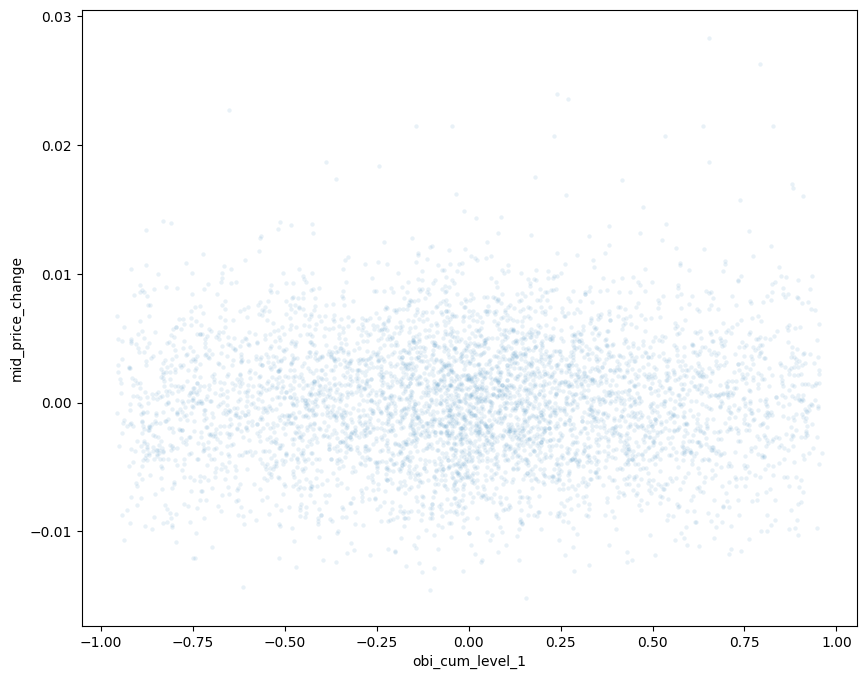

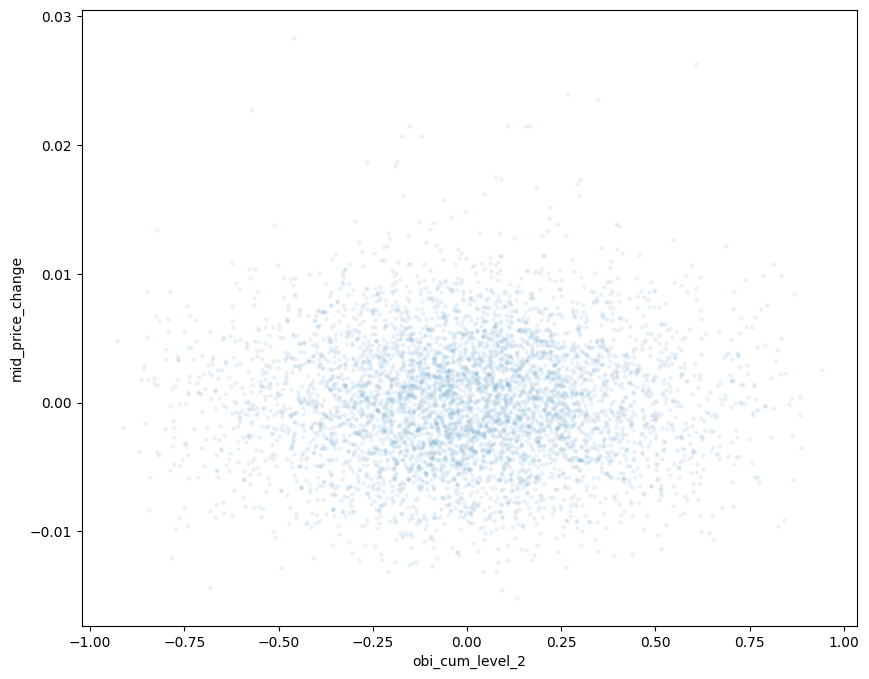

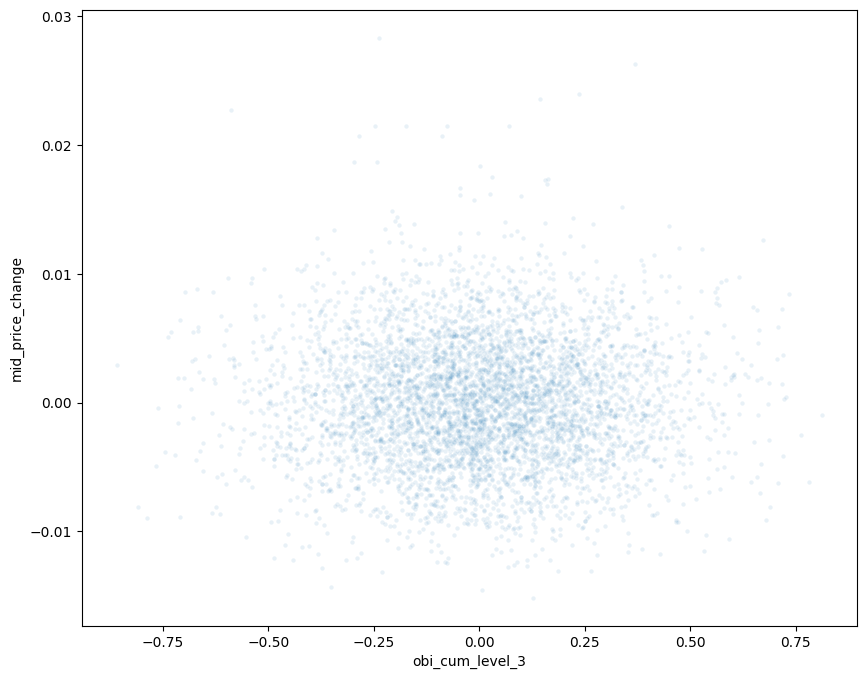

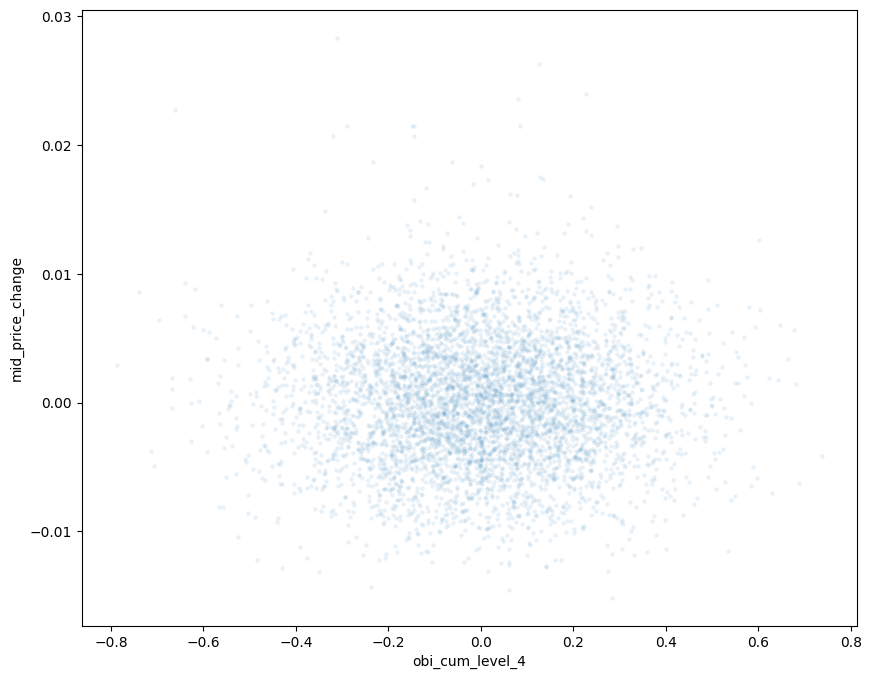

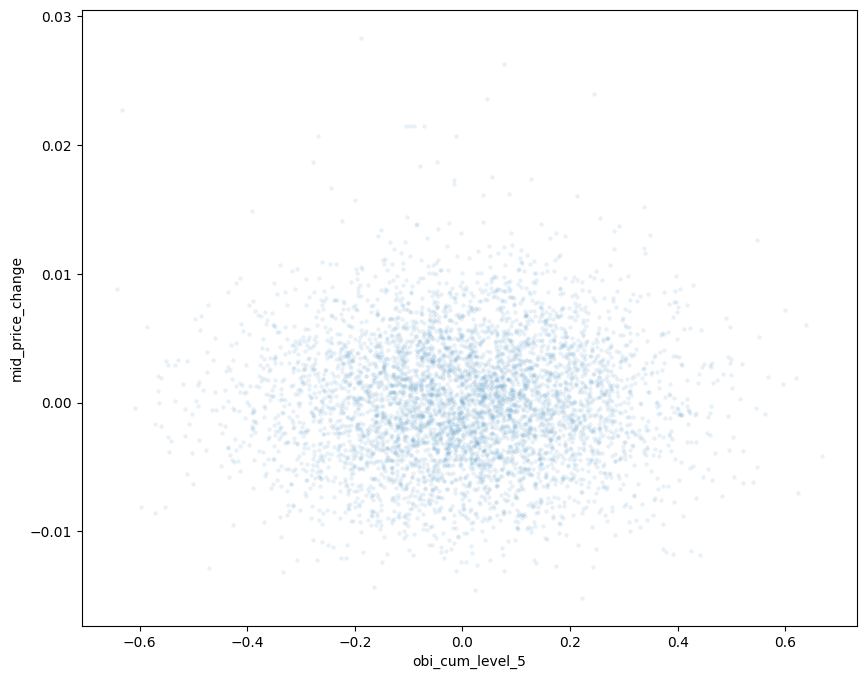

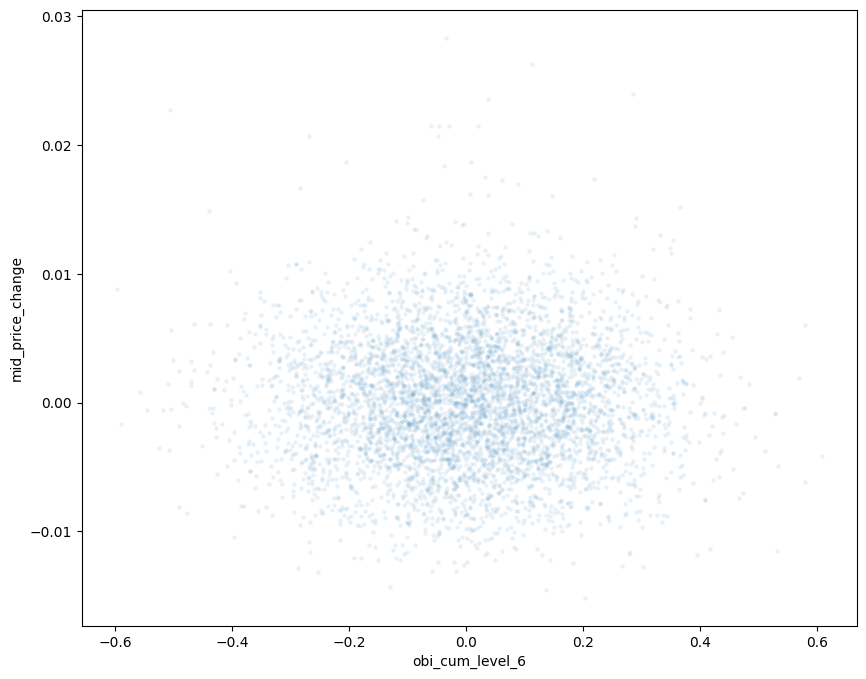

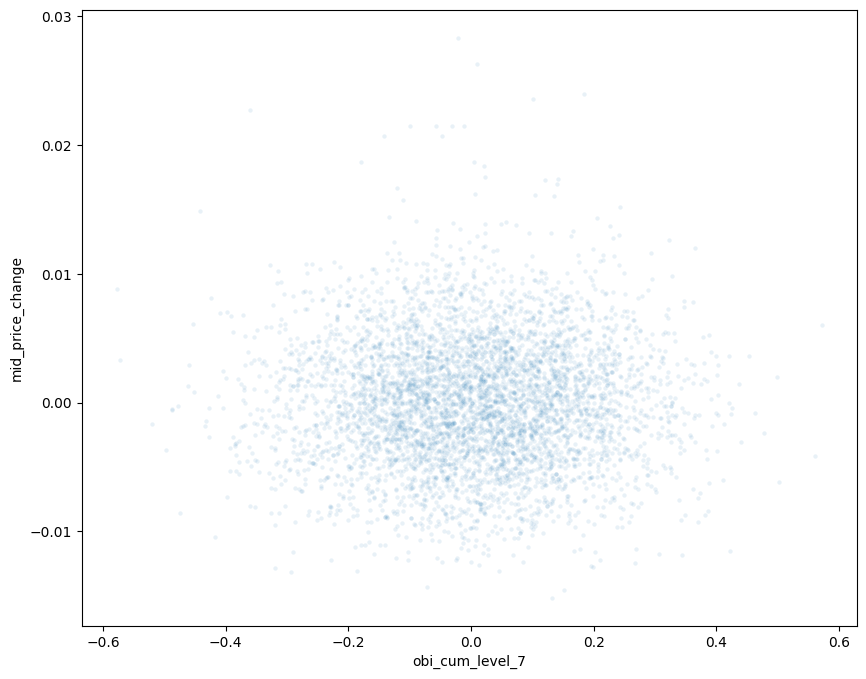

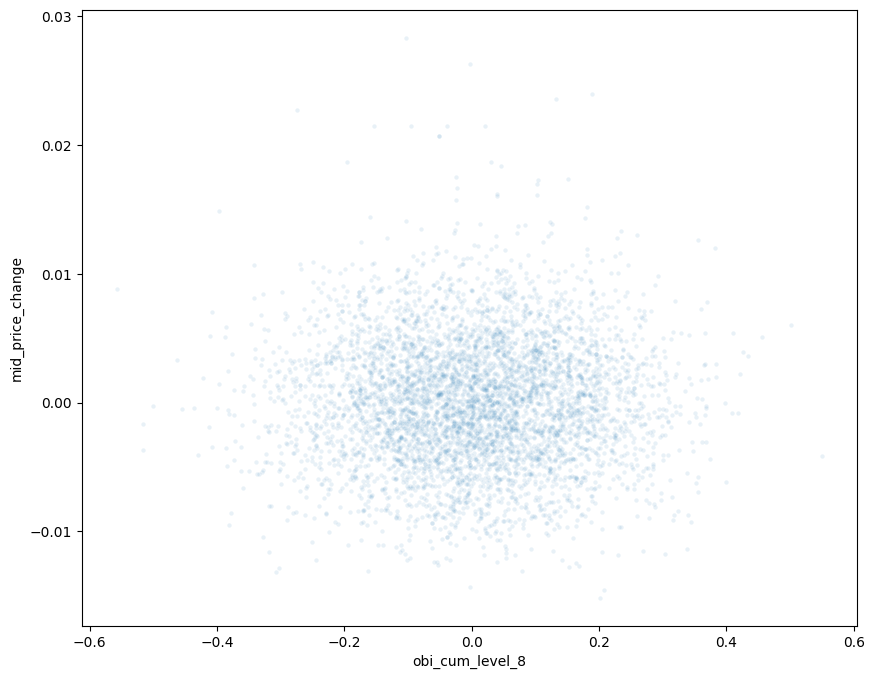

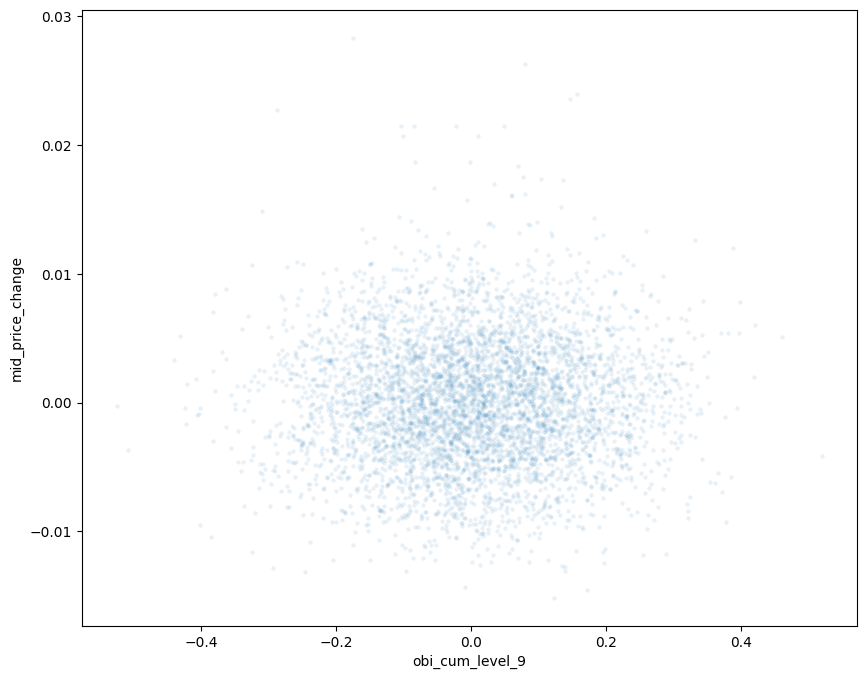

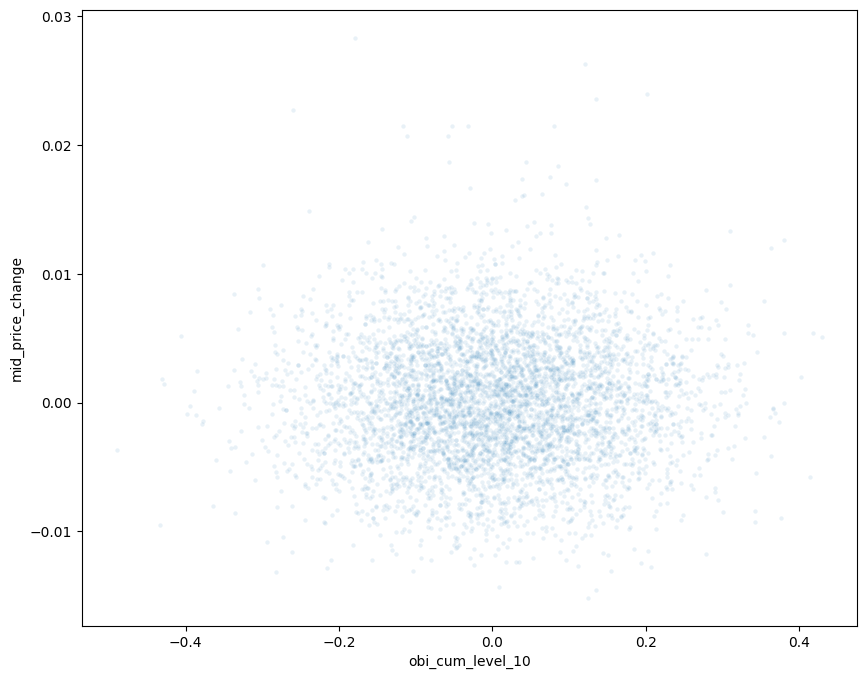

In [63]:
obi_cum_cols = [] 

for j in range(1, 11):
    cum_bid_vol = df_ob_sorted[f'cum_ask_vol_{j}']
    cum_ask_vol = df_ob_sorted[f'cum_bid_vol_{j}']

    numerator_obi = cum_bid_vol - cum_ask_vol
    denominator_obi = cum_bid_vol + cum_ask_vol 
    df_ob_sorted[f'obi_cum_level_{j}'] = numerator_obi.divide(denominator_obi).fillna(0)
    obi_cum_cols.append(f'obi_cum_level_{j}')

print(df_ob_sorted[obi_cum_cols].head())

predict_horizon_ticks = 5
df_ob_sorted['future_mid_price'] = df_ob_sorted['mid_price'].shift(-predict_horizon_ticks)
df_ob_sorted['mid_price_change'] = df_ob_sorted['future_mid_price'] - df_ob_sorted['mid_price']
df_order_book_processed = df_ob_sorted.dropna(subset=['future_mid_price', 'mid_price_change']).copy()


for j in range(1, 11):
    plt.figure(figsize=(10,8))
    sns.scatterplot(x=f'obi_cum_level_{j}', y='mid_price_change', data=df_order_book_processed, s=10, alpha=0.1)
    plt.show
